# A comparative analysis of Tree-Based Machine learning methods integrated with Resampling techniques for Predicting Severity in Construction Accidents
## Contents
 •	Introduction 
 
 •	Exploratory Data Analysis
 
 •	Data Preprocessing
 
 •	CART Feature Importance
 
 •	Baseline Models
 
 •	Hyperparameter Tuning

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import optuna
sns.set_theme()
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,  make_scorer
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# 1. Introduction
## 1.1 Data
This study aims to predict the severity of work-related construction accidents, explicitly distinguishing between fatal and nonfatal incidents. A dataset encompassing severe construction accidents in the USA from 2015 to 2017 was acquired from the Occupational Safety and Health Administration (US-OSHA)focused on construction accidents.

In [2]:
#Read Data
df = pd.read_csv(r"C:\Users\obasi\Desktop\csv files\OSHA HSE DATA_ALL ABSTRACTS 15-17_FINAL.csv",encoding='cp1252', low_memory=False)
df.head() 

,summary_nr,Event Date,Abstract Text,Event Description,Event Keywords,con_end,Construction_End_Use,build_stor,Building Stories,proj_cost,...,Event_type,evn_factor,Environmental_Factor,hum_factor,Human_Factor,task_assigned,Task_Assigned,hazsub,fat_cause,fall_ht
0,220982664,08/10/2017,"At 9:00 a.m. on August 10, 2017, an employee w...",EMPLOYEE'S FINGERS AMPUTATED WHILE OPERATING A...,"FINGER,MECHANICAL POWER PRESS,AMPUTATION,GUARD",0,,0,,0,...,Caught in or between,2,Catch Point/Puncture Action,14,Other,1,Regularly Assigned,0,0,0
1,220973937,7/17/2017,"At 9:45 a.m. on July 17, 2017, an employee was...",EMPLOYEE'S FINGER IS CAUGHT IN DRILL AND IS AM...,"CAUGHT IN,DRIVE SHAFT,RESIDENTIAL CONSTRUCTION...",H,Other building,1,1,0,...,Caught in or between,18,Other,10,Position Inappropriate For Task,1,Regularly Assigned,0,0,0
2,220967632,6/30/2017,"At 7:30 a.m. on June 30, 2017, an employee was...",EMPLOYEE IS HOSPITALIZED AFTER BEING INJURED I...,"AMPUTATED,EXPLOSION,FIREWORKS",0,,0,,0,...,Other,18,Other,4,Malfunction In Securing/Warning Op,2,Not Regularly Assigned,0,0,0
3,220969901,6/30/2017,"At 2:00 p.m. on June 30, 2017, an employee was...",EMPLOYEE FALLS FROM ROOF AND IS INJURED,"RIB,ROOF,HEAD,FALL PROTECTION,FALL,COLLARBONE,...",C,Commercial building,1,1,D,...,Fall (from elevation),13,Work-Surface/Facility-Layout Condition,14,Other,1,Regularly Assigned,0,15,0
4,220977748,6/23/2017,"At 12:20 p.m. on June 23, 2017, an employee wa...",EMPLOYEE IS STRUCK BY PLYWOOD WHILE UNLOADING ...,"STRUCK BY,TRUCK,BRAIN,NECK,FRACTURE,UNSTABLE LOAD",0,,0,,0,...,Struck-by,6,Overhead Moving/Falling Object Action,15,Insufficient/Lack/Housekeeping Program,1,Regularly Assigned,0,0,0


## 1.2 Project Objectives
This study aims to predict the injury severity of work-related construction accidents through a thorough exploration of resampling methods on tree-based ensemble models put forth in the current literature; we aim to address research gaps and make meaningful contributions to the overall welfare of construction workers..

## 1.3 Evaluation Metric
This study employs precision, F1-score, and recall as evaluation metrics, offering a more comprehensive evaluation of model performance. These metrics are defined as follows:

Precision = (TP/(TP+FP))
Recall = (TP/(TP+FN))  
F-score = ((2x(Precision x Recall))/((Precision+Recall)))

False Positives (FP) occur when the model incorrectly identifies an instance as belonging to the positive class. True Positives (TP) refer to instances where the model accurately predicts the positive class. On the other hand, False Negatives (FN) happen when the model fails to identify an instance that belongs to the positive class, mistakenly classifying it as negative. Consequently, in cases where the model performs well on the majority class but poorly on the minority class, the precision and recall values for the minority class are expected to be lower than those for the majority class. The F1 score is a valuable metric that combines precision and recall into a single value using their weighted average, providing a balanced measure of model performance.

## Exploratory Data Analysis

### 2.1 Basic Data Exploration

In [3]:
print("Shape of the Data: {} ". format(df.shape))

Shape of the Data: (4847, 29) 


In [4]:
df.columns

Index(['summary_nr', 'Event Date', 'Abstract Text', 'Event Description',
       'Event Keywords', 'con_end', 'Construction_End_Use', 'build_stor',
       'Building Stories', 'proj_cost', 'Project_Cost', 'proj_type',
       'Project_Type', 'Degree_of_Injury', 'nature_of_inj', 'Nature_of_Injury',
       'part_of_body', 'Part_of_Body', 'event_type', 'Event_type',
       'evn_factor', 'Environmental_Factor', 'hum_factor', 'Human_Factor',
       'task_assigned', 'Task_Assigned', 'hazsub', 'fat_cause', 'fall_ht'],
      dtype='object')

In [5]:
df.dtypes

summary_nr               int64
Event Date              object
Abstract Text           object
Event Description       object
Event Keywords          object
con_end                 object
Construction_End_Use    object
build_stor               int64
Building Stories        object
proj_cost               object
Project_Cost            object
proj_type               object
Project_Type            object
Degree_of_Injury        object
nature_of_inj            int64
Nature_of_Injury        object
part_of_body             int64
Part_of_Body            object
event_type               int64
Event_type              object
evn_factor               int64
Environmental_Factor    object
hum_factor               int64
Human_Factor            object
task_assigned            int64
Task_Assigned           object
hazsub                  object
fat_cause                int64
fall_ht                  int64
dtype: object

In [6]:
print("Number of integer columns: {} ". format(df.dtypes.tolist().count(df.dtypes[0])))
print("Number of object columns: {} ". format(df.dtypes.tolist().count(df.dtypes[20])))

Number of integer columns: 10 
Number of object columns: 10 


In [7]:
duplicate = df[df.duplicated()== True]
print("Number of duplicate rows: {} ".format(len(duplicate)))

Number of duplicate rows: 0 


In [8]:
df.isna().sum()

summary_nr              0
Event Date              0
Abstract Text           0
Event Description       0
Event Keywords          0
con_end                 0
Construction_End_Use    0
build_stor              0
Building Stories        0
proj_cost               0
Project_Cost            0
proj_type               0
Project_Type            0
Degree_of_Injury        0
nature_of_inj           0
Nature_of_Injury        2
part_of_body            0
Part_of_Body            2
event_type              0
Event_type              2
evn_factor              0
Environmental_Factor    7
hum_factor              0
Human_Factor            7
task_assigned           0
Task_Assigned           0
hazsub                  0
fat_cause               0
fall_ht                 0
dtype: int64

In [9]:
print("Total number of missing values: {}".format(df.isna().sum().sum()))
print("Number of columns with missing values: {}".format(len([col for col in df.columns if df[col].isnull().sum() > 0])))
print("Number of columns without missing values: {}".format(len([col for col in df.columns if df[col].isnull().sum() == 0])))

Total number of missing values: 20
Number of columns with missing values: 5
Number of columns without missing values: 24


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   summary_nr            4847 non-null   int64 
 1   Event Date            4847 non-null   object
 2   Abstract Text         4847 non-null   object
 3   Event Description     4847 non-null   object
 4   Event Keywords        4847 non-null   object
 5   con_end               4847 non-null   object
 6   Construction_End_Use  4847 non-null   object
 7   build_stor            4847 non-null   int64 
 8   Building Stories      4847 non-null   object
 9   proj_cost             4847 non-null   object
 10  Project_Cost          4847 non-null   object
 11  proj_type             4847 non-null   object
 12  Project_Type          4847 non-null   object
 13  Degree_of_Injury      4847 non-null   object
 14  nature_of_inj         4847 non-null   int64 
 15  Nature_of_Injury      4845 non-null   

In [11]:
print("Number of duplicate observations: {}".format(df.duplicated().sum()))

Number of duplicate observations: 0


In [12]:
df.describe()

,summary_nr,build_stor,nature_of_inj,part_of_body,event_type,evn_factor,hum_factor,task_assigned,fat_cause,fall_ht
count,4.847000e+03,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000,4847.0
mean,2.208956e+08,0.447287,11.852486,13.629255,5.193728,11.983701,9.456984,1.371157,3.065608,0.0
std,5.585438e+04,3.011749,7.634332,7.838927,4.608330,6.198560,6.161380,0.483164,7.247627,0.0
min,2.207779e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
25%,2.208494e+08,0.000000,5.000000,10.000000,2.000000,7.000000,1.000000,1.000000,0.000000,0.0
50%,2.209189e+08,0.000000,12.000000,13.000000,5.000000,13.000000,13.000000,1.000000,0.000000,0.0
75%,2.209406e+08,0.000000,21.000000,19.000000,6.000000,18.000000,14.000000,2.000000,0.000000,0.0
max,2.209923e+08,139.000000,22.000000,31.000000,14.000000,18.000000,20.000000,2.000000,30.000000,0.0


In [13]:
df.describe(include = "all").head(4).T

,count,unique,top,freq
summary_nr,4847.0,NaN,NaN,NaN
Event Date,4847,671,04/10/2017,49
Abstract Text,4847,4829,"At approximately 4:00 p.m. on March 23, 2017, ...",2
Event Description,4847,4320,EMPLOYEE FALLS FROM ROOF AND IS KILLED,46
Event Keywords,4847,4427,HEART ATTACK,46
con_end,4847,18,0,3820
Construction_End_Use,4847,18,,3820
build_stor,4847.0,NaN,NaN,NaN
Building Stories,4847,25,,4148
proj_cost,4847,8,0,4261


## 2.2. Data Visualization
### The target variable: Degree of Injury
The ***Degree_of_Injury*** is a categorical variable with two possible values.

In [14]:
df['Degree_of_Injury'].unique()

array(['Nonfatal', 'Fatal'], dtype=object)

In [15]:
df['Degree_of_Injury'].value_counts() 

Fatal       2964
Nonfatal    1883
Name: Degree_of_Injury, dtype: int64

In [16]:
# Add annotations function
def add_annotations(ax):
    for p in ax.patches:
        frequency = int(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(f'{frequency}', (x, y), size=12, ha='center', va='bottom')

# Visualization function
def count_donut(data, col):
    plt.figure(figsize=(14, 7))

    # Countplot
    ax1 = plt.subplot(1, 2, 1)
    count = sns.countplot(x=data[col])
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    sns.despine(top=True, right=True)
    add_annotations(ax1)

    # Donutplot
    ax2 = plt.subplot(1, 2, 2)
    
    # Get value counts and corresponding labels
    value_counts = data[col].value_counts()
    labels = value_counts.index.tolist()
    sizes = value_counts.values
    
    plt.pie(sizes,
            labels=labels,
            autopct='%1.2f%%',
            pctdistance=0.8,
            shadow=False,
            radius=1.3,
            textprops={'fontsize': 14}
            )
    circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(circle)
    ax2.set_xlabel('')

    plt.suptitle(f"Frequency Comparison of {col}", fontsize=16)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

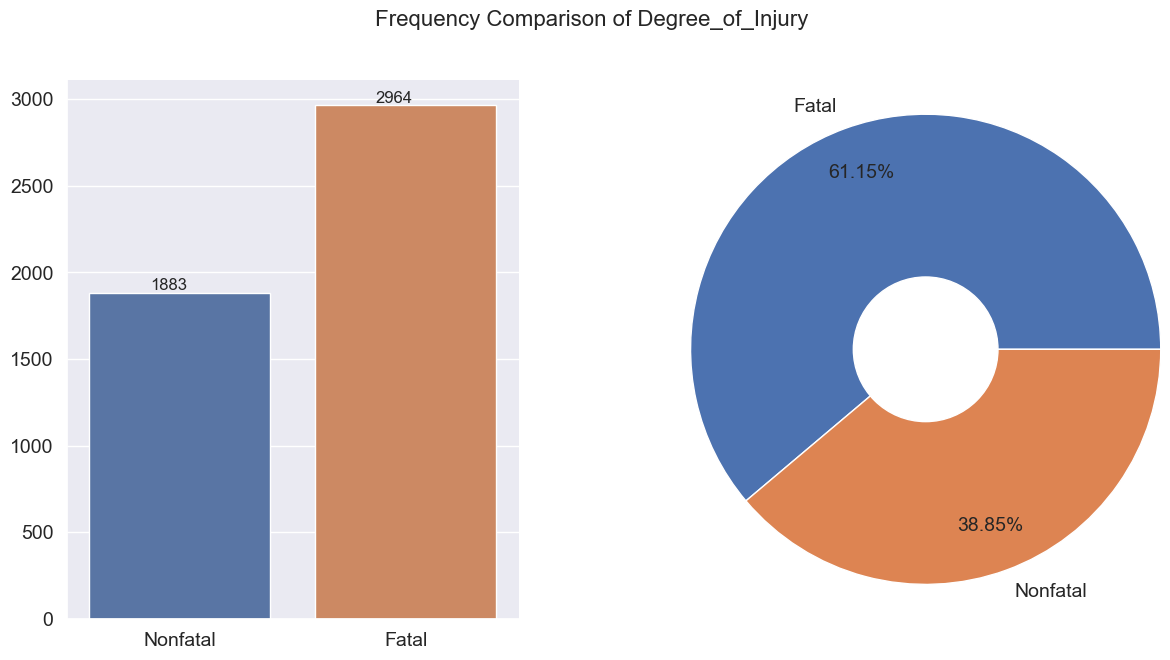

In [17]:
count_donut(df, 'Degree_of_Injury')

**The charts indicate that the data concerning the target variable (Degree_of_Injury) is imbalanced**. Most accidents fall into the fatal category, accounting for 61.15% of the instances. Then the non-fatal accident accounting for 38.85% of the dataset. Next, we will explore the various feature variables to understand how the target variable behaves in relation to changes in these features.

## 3. Data Preprocessing

### 3.1 Missing Data Imputation

In [18]:
# Set the list of features to include in Machine Learning
feature_lst=['build_stor', 'Degree_of_Injury', 'nature_of_inj',  'part_of_body', 'event_type', 'evn_factor', 'hum_factor', 'task_assigned', 'fat_cause']

In [19]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   build_stor        4847 non-null   int64 
 1   Degree_of_Injury  4847 non-null   object
 2   nature_of_inj     4847 non-null   int64 
 3   part_of_body      4847 non-null   int64 
 4   event_type        4847 non-null   int64 
 5   evn_factor        4847 non-null   int64 
 6   hum_factor        4847 non-null   int64 
 7   task_assigned     4847 non-null   int64 
 8   fat_cause         4847 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 340.9+ KB


In [20]:
df = df_sel

In [21]:
# Combining similar values
def combine_similar(df):
    df = df.replace('Unknown', 'unknown')
    df = df.replace('Other', 'other')
    df = df.replace('Unknown or other', 'other')
    return df

In [22]:
df = combine_similar(df)

In [23]:
# Columns with missing values (sorted by count)
df.isna().sum()[df.isna().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [24]:
# Rows with missing values (sorted by count)
df.T.isna().sum()[df.T.isna().sum() != 0].sort_values(ascending = False)

Series([], dtype: int64)

In [25]:
# Converting unknown/other/na to nan
def more_missing(df):
    df = df.replace('unknown', np.nan)
    df = df.replace('other', np.nan)
    df = df.replace('na', np.nan)
    return df

In [26]:
df = more_missing(df)

In [27]:
def mode_imputer(df):
    df_imputed = df.copy(deep = True)
    imputer = SimpleImputer(strategy = 'most_frequent')
    data_imputed.iloc[:,:] = imputer.fit_transform(df_imputed)
    return df_imputed

In [28]:
# Function to assign the missing values to the 'unknown' category
def unknown_imputer(df):
    df_unknown = df.copy(deep = True)
    df_unknown = df_unknown.replace(np.nan, 'Unknown')
    return df_unknown

In [29]:
def prop_imputer(df):
    df_prop = df.copy(deep = True)
    missing_cols = df_prop.isna().sum()[df_prop.isna().sum() != 0].index.tolist()
    for col in missing_cols:
        values_col = df_prop[col].value_counts(normalize = True).index.tolist()
        probabilities_col = df_prop[col].value_counts(normalize = True).values.tolist()
        df_prop[col] = df_prop[col].fillna(pd.Series(np.random.choice(values_col, p = probabilities_col, size = len(df))))
    return df_prop

In [30]:
df_imp = prop_imputer(df)

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


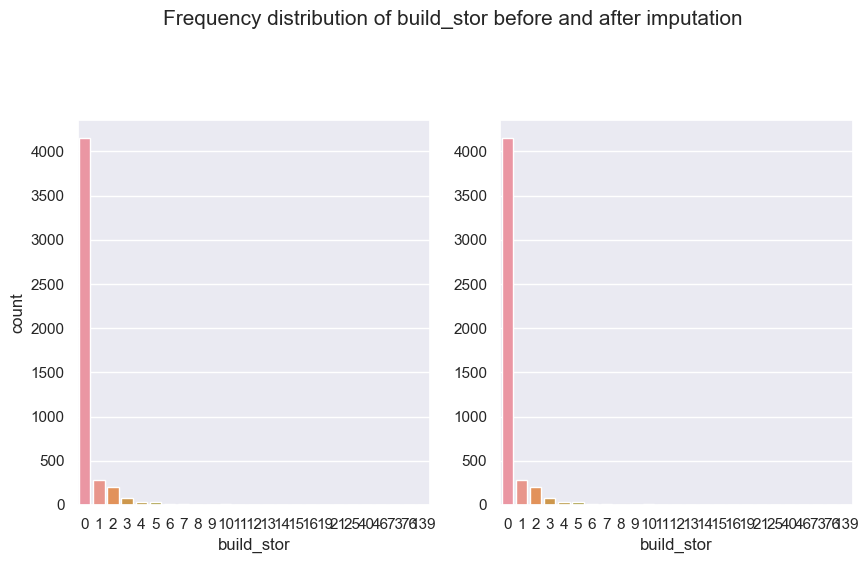

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


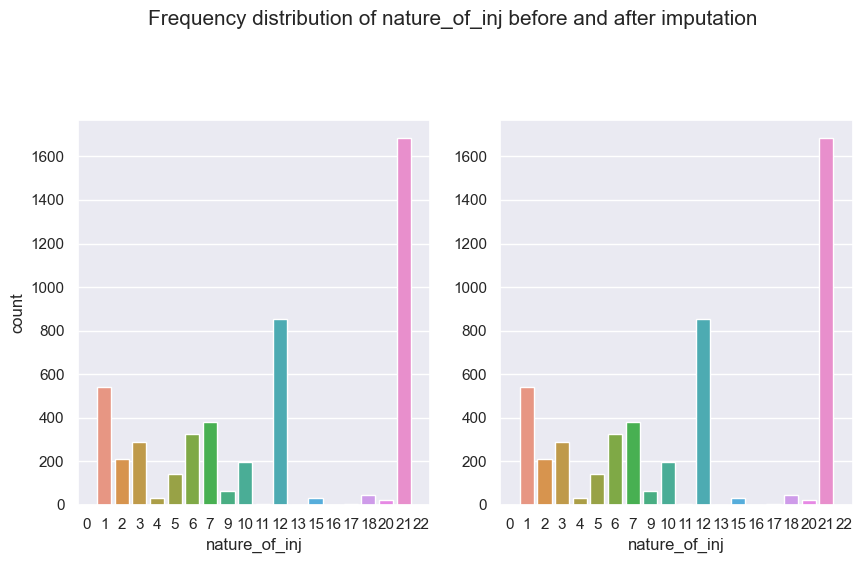

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


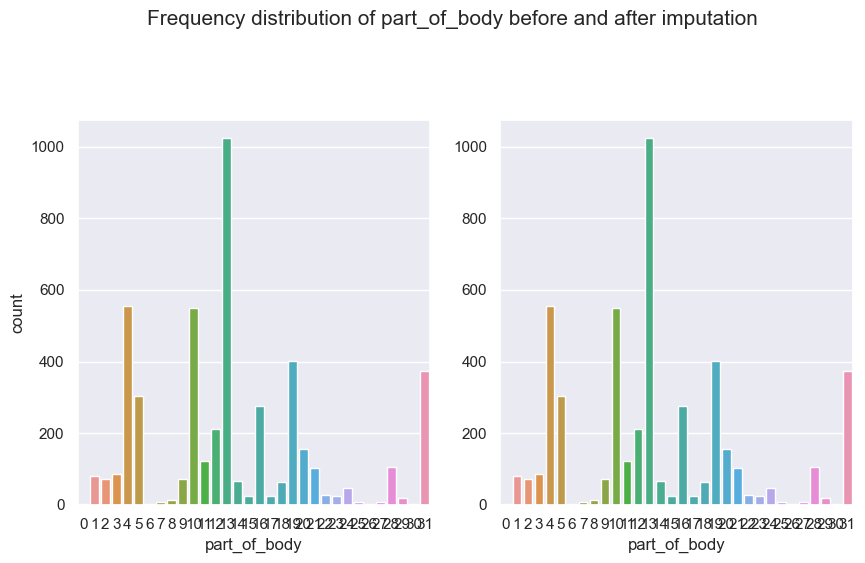

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


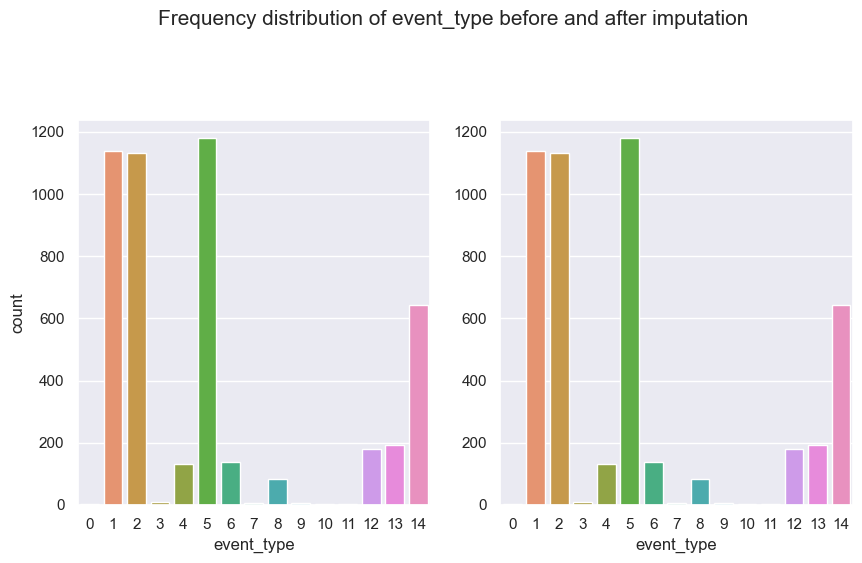

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


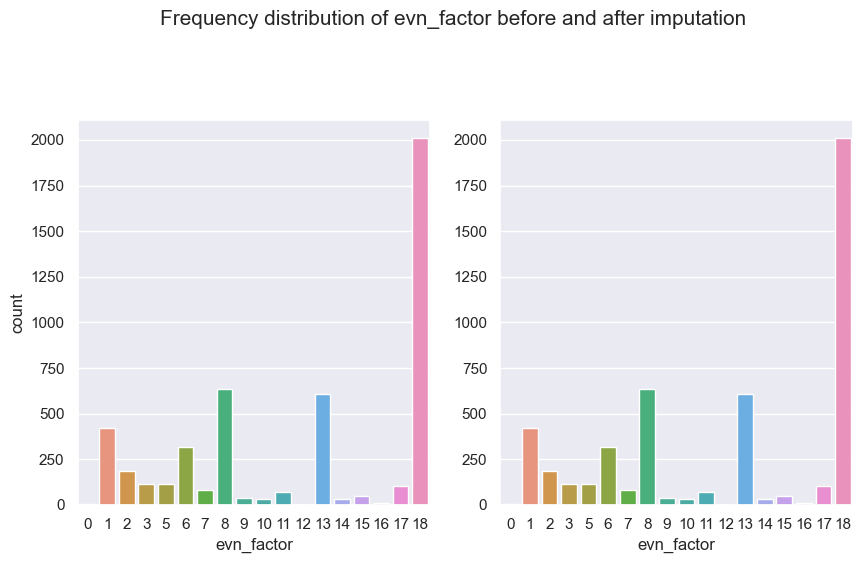

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


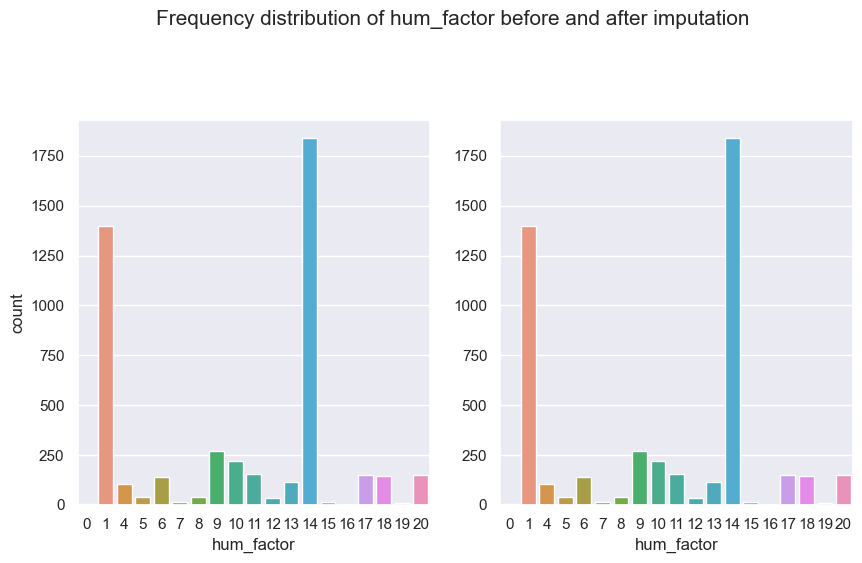

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


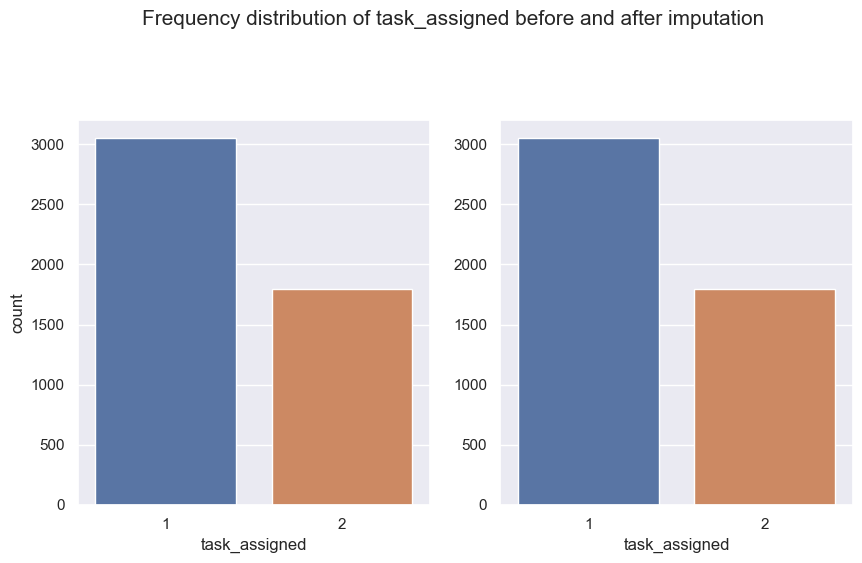

C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\obasi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


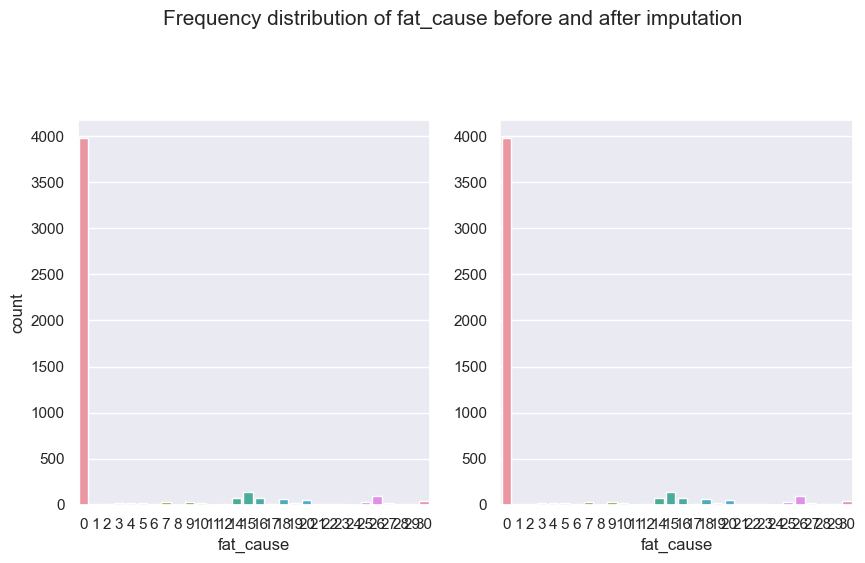

In [31]:
# Variables except 'Accident_severity' and 'Time'
features_others = [x for x in df.columns.tolist() if x not in ['Degree_of_Injury']]
for feature in features_others:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    ax1 = sns.countplot(df[feature], ax = ax1)
    ax2 = sns.countplot(df_imp[feature], ax = ax2)
    ax2.set_ylabel('')
    plt.suptitle("Frequency distribution of {} before and after imputation".format(feature), y = 1.1, fontsize = 15)
    plt.show()

In [32]:
#Check and count rows of missing data for each column
missing_number=df.isnull().sum().sort_values(ascending=False)

#Calculate percentage of null value
missing_percentage=missing_number/len(df)
missing_info=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing number','missing percentage'])
missing_info.head(20)

,missing number,missing percentage
build_stor,0,0.0
Degree_of_Injury,0,0.0
nature_of_inj,0,0.0
part_of_body,0,0.0
event_type,0,0.0
evn_factor,0,0.0
hum_factor,0,0.0
task_assigned,0,0.0
fat_cause,0,0.0


### 3.2 Categorical Data Encoding
We employed Label encoding to convert categorical variables into numerical values. The standard-scaler method was employed for feature scaling in this study. The Standard-scaler transforms numeric features to yield a distribution with a mean value of 0 and a standard deviation of 1.

In [33]:
#Get list of categorical variables
s=(df.dtypes=='object')
object_cols=list(s[s].index)
print("Categorical variables in the dataset:",object_cols)

#Label Encoding the categorical varibles
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
print("All Features are now numerical")

# Standard Scaling
scaler=StandardScaler()
scaler.fit(df)
scaled_ds=pd.DataFrame(scaler.transform(df),columns=df.columns)
print("All features are now scaled")

Categorical variables in the dataset: ['Degree_of_Injury']
All Features are now numerical
All features are now scaled


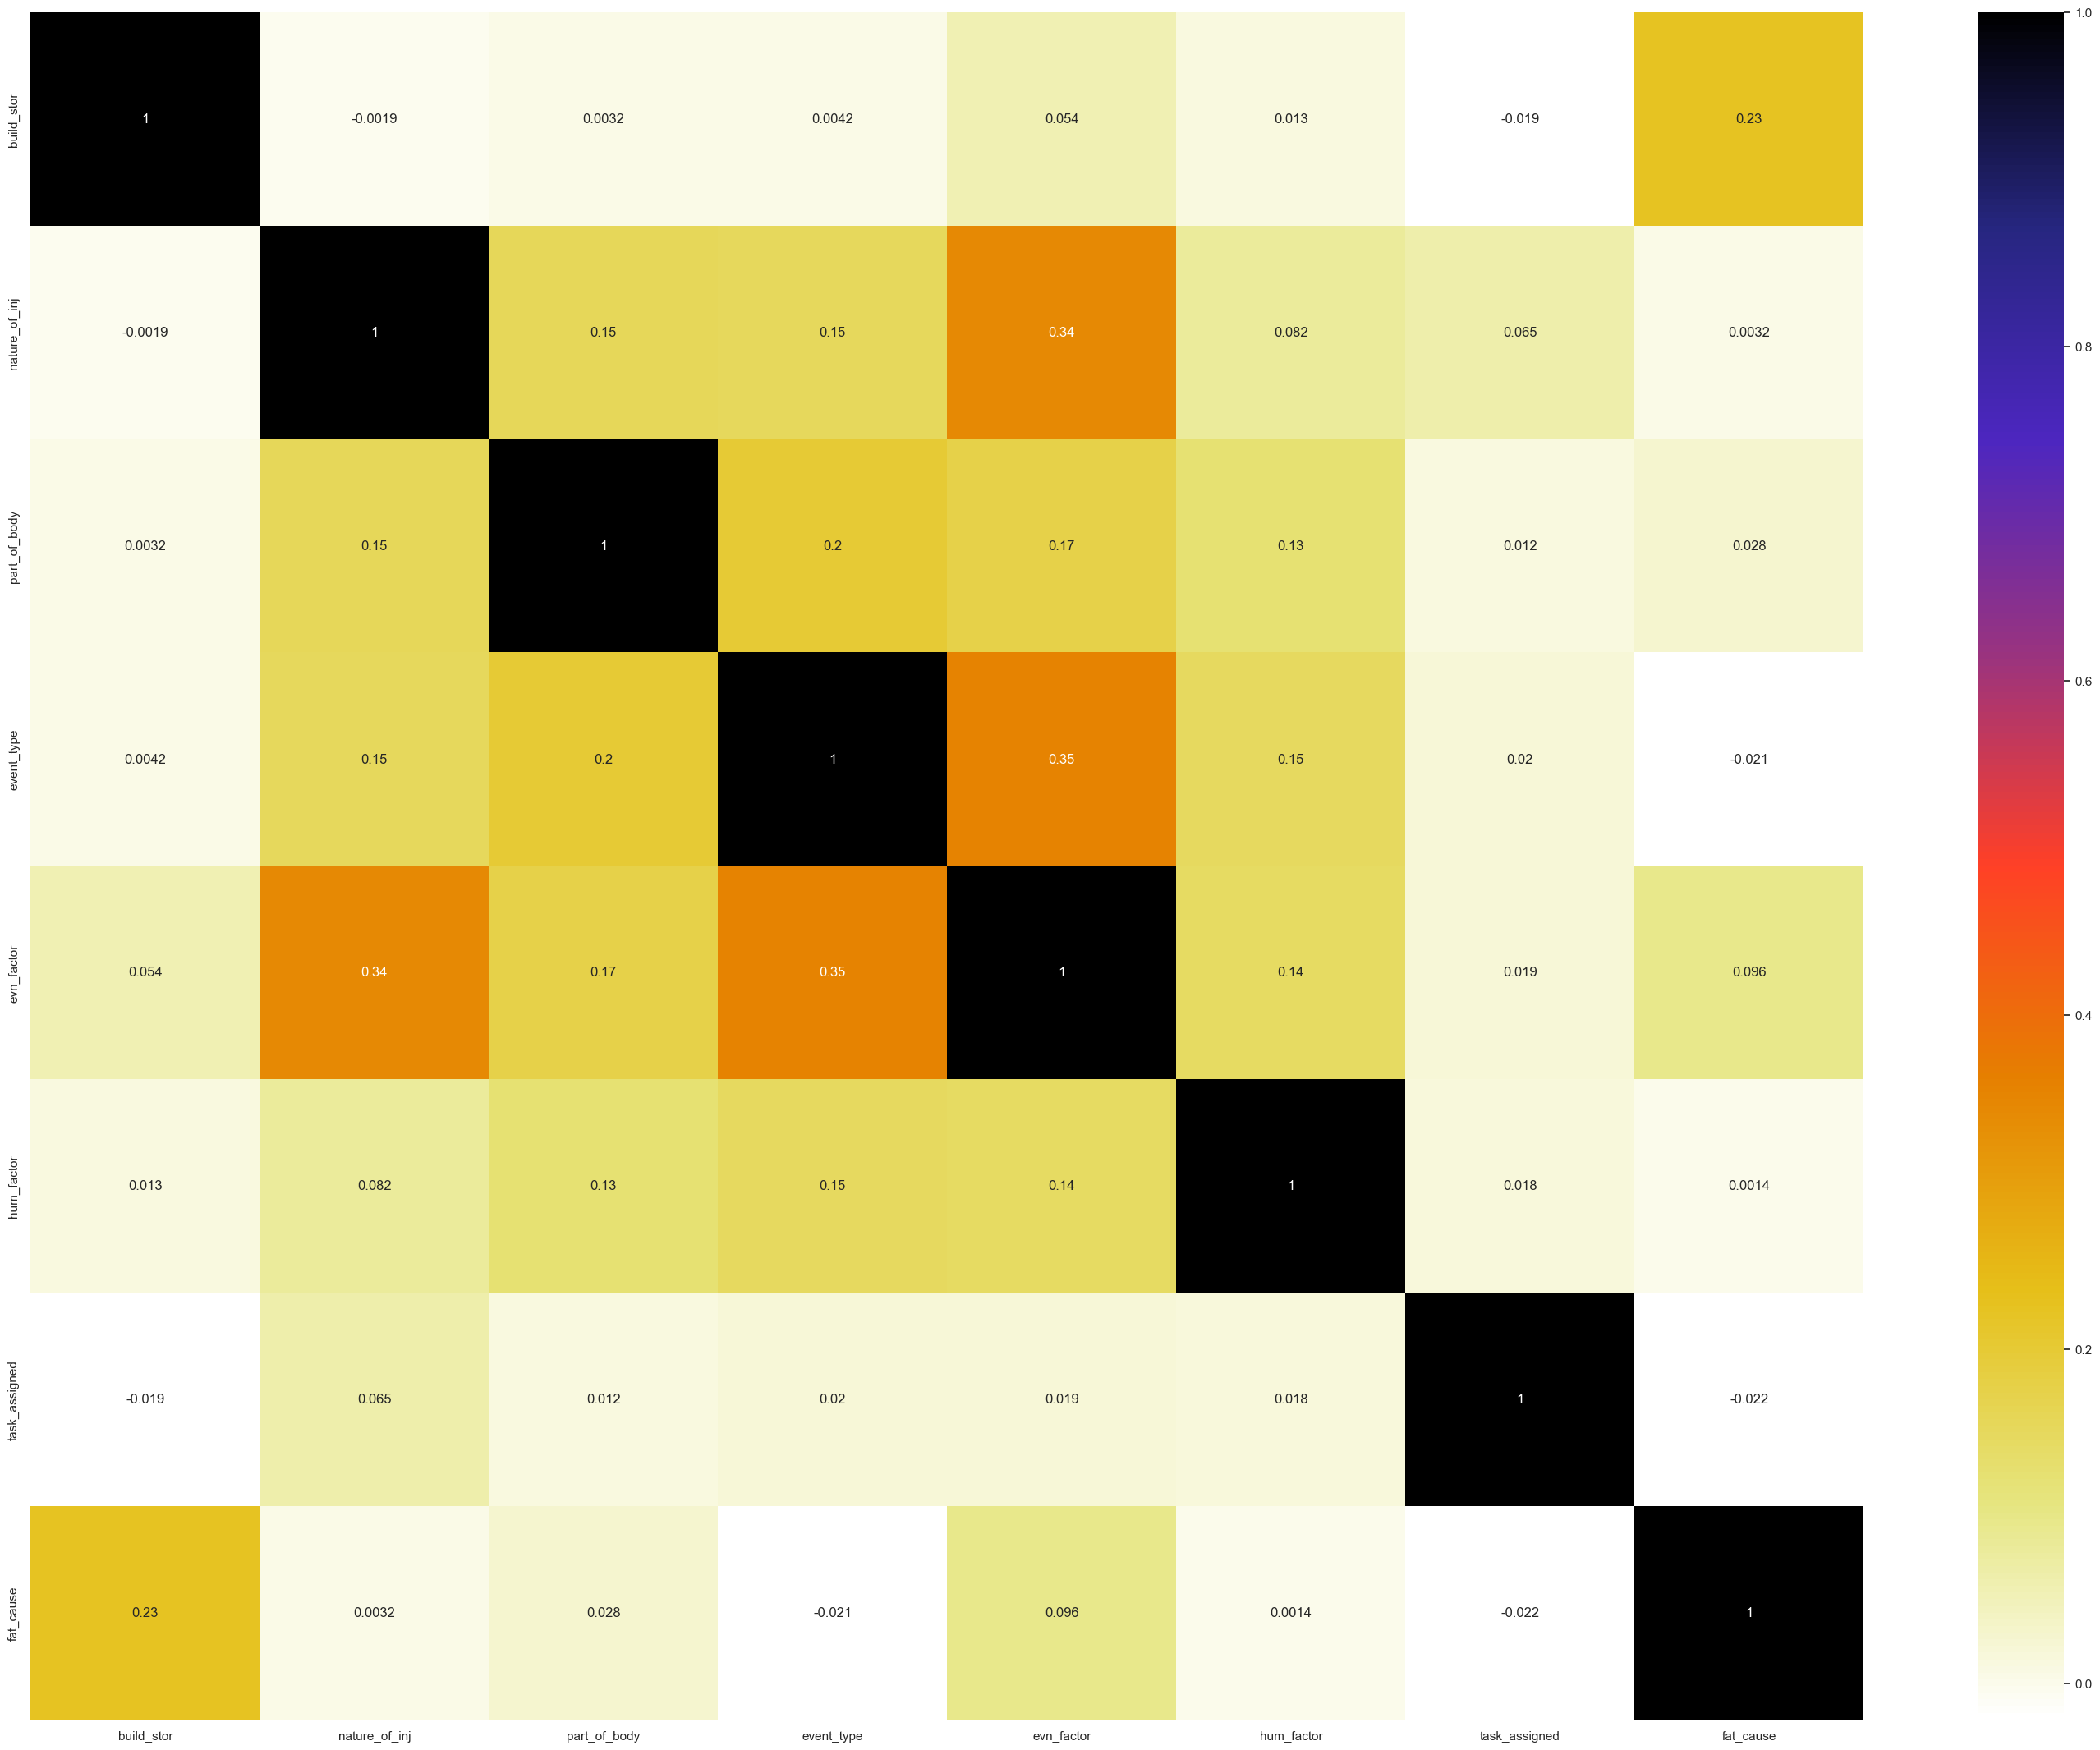

In [34]:
def heatmap(df):
    plt.figure(figsize = (36, 27))
    sns.heatmap(df.corr(), annot = True, cmap = plt.cm.CMRmap_r)
    
df_heat = df.drop('Degree_of_Injury', axis = 1)
heatmap(df_heat)

### 3.3 Feature Importance Selection 
This study utilized the CART model to identify key variables before predicting the "Degree of Injury". Feature selection was conducted for the target variable: 'Degree_of_Injury'. The x-axis represents the importance of each variable using z-scores, and the y-axis lists the corresponding variables. The importance rankings indicate the relative contribution of each feature within the CART model.

Most significant features for Degree of Injury based on CART:
         Feature  Importance
1  nature_of_inj    0.411081
2   part_of_body    0.271448
4     evn_factor    0.082383
5     hum_factor    0.081396
3     event_type    0.058164
0     build_stor    0.033876
7      fat_cause    0.033559
6  task_assigned    0.028092


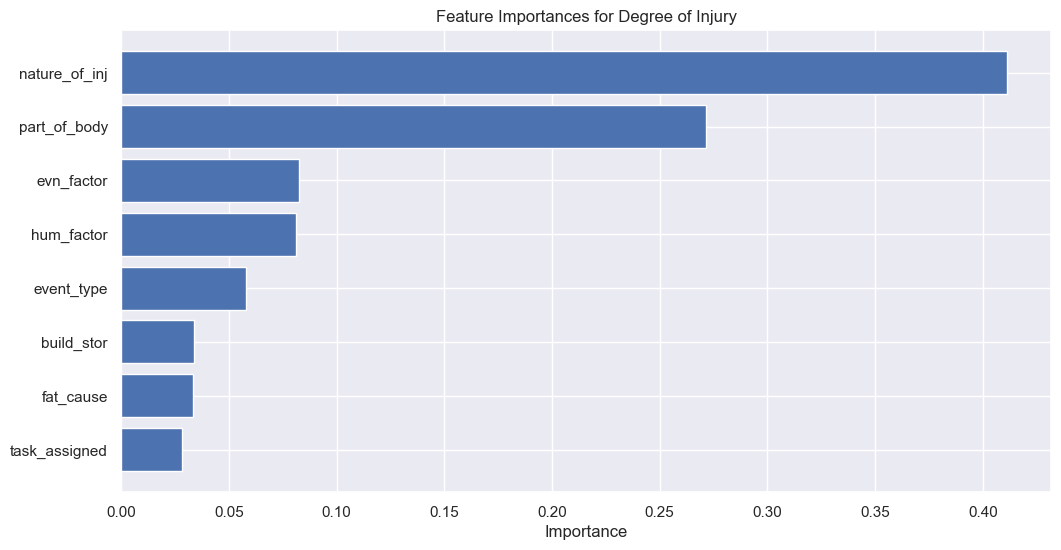

In [35]:

# Target variable for prediction and feature selection
target_degree_of_injury = 'Degree_of_Injury'

# Encode the target variable (if it's categorical)
label_encoder_injury = LabelEncoder()
df[target_degree_of_injury] = label_encoder_injury.fit_transform(df[target_degree_of_injury])

# Separate features and target
y_injury = df[target_degree_of_injury]
X_injury = df.drop(columns=[target_degree_of_injury])

# Handle non-numeric columns by encoding them
for column in X_injury.columns:
    if X_injury[column].dtype == 'object':
        X_injury[column] = LabelEncoder().fit_transform(X_injury[column])

# Fit a Decision Tree Classifier (CART) to select important features for Degree of Injury
tree_injury = DecisionTreeClassifier(random_state=42)
tree_injury.fit(X_injury, y_injury)

# Extract feature importances
importances_injury = tree_injury.feature_importances_
feature_names_injury = X_injury.columns

# Create a DataFrame for feature importances and sort by importance
feature_importances_injury = pd.DataFrame({'Feature': feature_names_injury, 'Importance': importances_injury})
feature_importances_injury = feature_importances_injury.sort_values(by='Importance', ascending=False)

# Print the most significant features
print("Most significant features for Degree of Injury based on CART:")
print(feature_importances_injury)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances_injury['Feature'], feature_importances_injury['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances for Degree of Injury')
plt.gca().invert_yaxis()
plt.show()


## 4. Baseline Models
First, we established the predictor-target split. The dataset was then divided into two parts, with 70% allocated for training and validation and the remaining 30% reserved for testing the final model's performance. To address class imbalance, we applied different resampling methods (ROS, SMOTE, ADASYN, RUS and original dataset) on each of the baseline models. Baseline models, including Random Forest, XGBoost and CatBoost, were developed. We then used Tree-structured Parzen Estimator to identify the optimal hyperparameters for the baseline models to achieve the highest accuracy. 

In [36]:

# Set the target for the prediction
target='Degree_of_Injury'



# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [37]:


# Set Resampling methods
resampling_methods = {
    'ROS': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RUS': RandomUnderSampler(random_state=42),
    'None': None  # No resampling
}

# Define the objective function for Hyperparameter tuning (Optuna)
def objective(trial, model_name, X_resampled, y_resampled):
    if model_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif model_name == 'XGBoost':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 3, 10)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
        model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    else:  # CatBoost
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
        depth = trial.suggest_int('depth', 3, 10)
        model = CatBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, depth=depth, verbose=0, random_state=42)

    # Use cross-validation to evaluate the model
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='f1_macro')
    
    return scores.mean()

# Train and evaluate models
def train_and_evaluate(X_train, X_test, y_train, y_test):
    for method_name, sampler in resampling_methods.items():
        print(f"--- Resampling Method: {method_name} ---")
        
        # Apply the resampling method to the training data
        if sampler is not None:
            X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        else:
            X_resampled, y_resampled = X_train, y_train
        
        # Iterate through each model
        for model_name in ['RandomForest', 'XGBoost', 'CatBoost']:
            print(f"Optimizing {model_name} with {method_name} resampling...")
            
            # Optimize hyperparameters using Optuna
            study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=42))
            study.optimize(lambda trial: objective(trial, model_name, X_resampled, y_resampled), n_trials=50)
            
            # Get the best model and its hyperparameters
            best_params = study.best_trial.params
            
            if model_name == 'RandomForest':
                model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
            elif model_name == 'XGBoost':
                model = XGBClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], learning_rate=best_params['learning_rate'], random_state=42)
            else:
                model = CatBoostClassifier(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'], depth=best_params['depth'], verbose=0, random_state=42)
            
            # Train the model on the resampled data
            model.fit(X_resampled, y_resampled)
            
            # Predict on the test set
            y_pred = model.predict(X_test)
            
            # Display the classification report and best hyperparameters 
            print(f"Best Hyperparameters for {model_name} with {method_name} resampling: {best_params}")
            print(f"Classification Report for {model_name} with {method_name} resampling:")
            print(classification_report(y_test, y_pred))
            print("-" * 80)

y = df[target]
X = df.drop(target, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Run the training and evaluation
train_and_evaluate(X_train, X_test, y_train, y_test)


[I 2024-08-26 13:35:42,944] A new study created in memory with name: no-name-52e2435e-279e-400d-aabe-f1c30daa484e


--- Resampling Method: ROS ---
Optimizing RandomForest with ROS resampling...


[I 2024-08-26 13:35:45,486] Trial 0 finished with value: 0.8809009304627453 and parameters: {'n_estimators': 144, 'max_depth': 20}. Best is trial 0 with value: 0.8809009304627453.
[I 2024-08-26 13:35:49,352] Trial 1 finished with value: 0.8833083727023844 and parameters: {'n_estimators': 233, 'max_depth': 14}. Best is trial 1 with value: 0.8833083727023844.
[I 2024-08-26 13:35:50,496] Trial 2 finished with value: 0.8393917452571573 and parameters: {'n_estimators': 89, 'max_depth': 7}. Best is trial 1 with value: 0.8833083727023844.
[I 2024-08-26 13:35:51,572] Trial 3 finished with value: 0.8809044281215546 and parameters: {'n_estimators': 64, 'max_depth': 18}. Best is trial 1 with value: 0.8833083727023844.
[I 2024-08-26 13:35:54,979] Trial 4 finished with value: 0.8825848380184697 and parameters: {'n_estimators': 200, 'max_depth': 16}. Best is trial 1 with value: 0.8833083727023844.
[I 2024-08-26 13:35:55,904] Trial 5 finished with value: 0.8804224370283377 and parameters: {'n_estimat

[I 2024-08-26 13:38:37,198] Trial 46 finished with value: 0.8837929518820697 and parameters: {'n_estimators': 269, 'max_depth': 17}. Best is trial 45 with value: 0.8837929518820697.
[I 2024-08-26 13:38:41,372] Trial 47 finished with value: 0.8794499198161757 and parameters: {'n_estimators': 273, 'max_depth': 18}. Best is trial 45 with value: 0.8837929518820697.
[I 2024-08-26 13:38:42,591] Trial 48 finished with value: 0.8816268121771034 and parameters: {'n_estimators': 79, 'max_depth': 19}. Best is trial 45 with value: 0.8837929518820697.
[I 2024-08-26 13:38:45,966] Trial 49 finished with value: 0.8813830664073266 and parameters: {'n_estimators': 220, 'max_depth': 17}. Best is trial 45 with value: 0.8837929518820697.
[I 2024-08-26 13:38:46,965] A new study created in memory with name: no-name-08d24b99-9991-4ace-8e35-e07c958d5eda


Best Hyperparameters for RandomForest with ROS resampling: {'n_estimators': 269, 'max_depth': 17}
Classification Report for RandomForest with ROS resampling:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       890
           1       0.82      0.76      0.79       565

    accuracy                           0.84      1455
   macro avg       0.84      0.83      0.83      1455
weighted avg       0.84      0.84      0.84      1455

--------------------------------------------------------------------------------
Optimizing XGBoost with ROS resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:38:48,168] Trial 0 finished with value: 0.881365311831015 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.1205712628744377}. Best is trial 0 with value: 0.881365311831015.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:38:49,104] Trial 1 finished with value: 0.8420427010478317 and parameters: {'n_est

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:00,283] Trial 15 finished with value: 0.8652824842473652 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.036157993062160616}. Best is trial 14 with value: 0.8820993734829947.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:00,646] Trial 16 finished with value: 0.8717076285077594 and parameters: {

[I 2024-08-26 13:39:12,597] Trial 29 finished with value: 0.86384761002203 and parameters: {'n_estimators': 293, 'max_depth': 3, 'learning_rate': 0.057841143502320246}. Best is trial 17 with value: 0.8861897084314446.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:13,490] Trial 30 finished with value: 0.8820795331547675 and parameters: {'n_estimators': 168, 'max_depth': 7, 'learning_rate': 0.23411293965113184}. Best is trial 17 with value: 0.8861897084314446.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

[I 2024-08-26 13:39:27,666] Trial 44 finished with value: 0.8845060941407692 and parameters: {'n_estimators': 172, 'max_depth': 6, 'learning_rate': 0.22936579620849318}. Best is trial 17 with value: 0.8861897084314446.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:28,428] Trial 45 finished with value: 0.8813609300664194 and parameters: {'n_estimators': 145, 'max_depth': 7, 'learning_rate': 0.2557791700767651}. Best is trial 17 with value: 0.8861897084314446.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Best Hyperparameters for XGBoost with ROS resampling: {'n_estimators': 185, 'max_depth': 6, 'learning_rate': 0.21737059260444214}
Classification Report for XGBoost with ROS resampling:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       890
           1       0.82      0.78      0.80       565

    accuracy                           0.85      1455
   macro avg       0.84      0.84      0.84      1455
weighted avg       0.85      0.85      0.85      1455

--------------------------------------------------------------------------------
Optimizing CatBoost with ROS resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:33,153] Trial 0 finished with value: 0.8743716992981806 and parameters: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}. Best is trial 0 with value: 0.8743716992981806.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:39:34,610] Trial 1 finished with value: 0.8311268099733742 and parameters: {'n_estima

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:40:00,286] Trial 15 finished with value: 0.8818523247835228 and parameters: {'n_estimators': 292, 'learning_rate': 0.05025837404552662, 'depth': 8}. Best is trial 14 with value: 0.88499404524817.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:40:04,105] Trial 16 finished with value: 0.8816151777416487 and parameters: {'n_esti

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:40:44,924] Trial 30 finished with value: 0.8799279053082826 and parameters: {'n_estimators': 237, 'learning_rate': 0.1854618015028268, 'depth': 8}. Best is trial 28 with value: 0.8852330925958241.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:40:48,371] Trial 31 finished with value: 0.8804158773312816 and parameters: {'n_est

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:41:38,191] Trial 45 finished with value: 0.8779904024614288 and parameters: {'n_estimators': 285, 'learning_rate': 0.04806288832238672, 'depth': 8}. Best is trial 28 with value: 0.8852330925958241.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:41:38,792] Trial 46 finished with value: 0.8226276357395736 and parameters: {'n_es

Best Hyperparameters for CatBoost with ROS resampling: {'n_estimators': 275, 'learning_rate': 0.06509981833611633, 'depth': 8}
Classification Report for CatBoost with ROS resampling:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       890
           1       0.83      0.79      0.81       565

    accuracy                           0.85      1455
   macro avg       0.85      0.84      0.84      1455
weighted avg       0.85      0.85      0.85      1455

--------------------------------------------------------------------------------
--- Resampling Method: SMOTE ---
Optimizing RandomForest with SMOTE resampling...


[I 2024-08-26 13:41:49,767] Trial 0 finished with value: 0.8583744863466768 and parameters: {'n_estimators': 144, 'max_depth': 20}. Best is trial 0 with value: 0.8583744863466768.
[I 2024-08-26 13:46:09,552] Trial 1 finished with value: 0.8677998068345147 and parameters: {'n_estimators': 233, 'max_depth': 14}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:46:11,323] Trial 2 finished with value: 0.8451663349432911 and parameters: {'n_estimators': 89, 'max_depth': 7}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:46:12,921] Trial 3 finished with value: 0.8610366190214774 and parameters: {'n_estimators': 64, 'max_depth': 18}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:46:17,166] Trial 4 finished with value: 0.8605782949975994 and parameters: {'n_estimators': 200, 'max_depth': 16}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:46:18,020] Trial 5 finished with value: 0.8561925995589427 and parameters: {'n_estimat

[I 2024-08-26 13:48:32,016] Trial 46 finished with value: 0.8646737014780393 and parameters: {'n_estimators': 101, 'max_depth': 15}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:48:35,545] Trial 47 finished with value: 0.8646699457682754 and parameters: {'n_estimators': 261, 'max_depth': 11}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:48:38,222] Trial 48 finished with value: 0.8613089522680676 and parameters: {'n_estimators': 169, 'max_depth': 17}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:48:41,581] Trial 49 finished with value: 0.8504476844948112 and parameters: {'n_estimators': 291, 'max_depth': 8}. Best is trial 1 with value: 0.8677998068345147.
[I 2024-08-26 13:48:42,384] A new study created in memory with name: no-name-a4b519d7-d50a-4213-b048-b95ba4c79db6


Best Hyperparameters for RandomForest with SMOTE resampling: {'n_estimators': 233, 'max_depth': 14}
Classification Report for RandomForest with SMOTE resampling:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       890
           1       0.84      0.77      0.80       565

    accuracy                           0.85      1455
   macro avg       0.85      0.84      0.84      1455
weighted avg       0.85      0.85      0.85      1455

--------------------------------------------------------------------------------
Optimizing XGBoost with SMOTE resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:48:43,473] Trial 0 finished with value: 0.8637396299915416 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.1205712628744377}. Best is trial 0 with value: 0.8637396299915416.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:48:44,058] Trial 1 finished with value: 0.8463392124137007 and parameters: {'n_e

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:48:54,330] Trial 15 finished with value: 0.873033691476285 and parameters: {'n_estimators': 185, 'max_depth': 3, 'learning_rate': 0.17585866811500608}. Best is trial 11 with value: 0.8742774062338668.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:48:55,060] Trial 16 finished with value: 0.8715762397998137 and parameters: {'n

[I 2024-08-26 13:49:04,131] Trial 29 finished with value: 0.8674152810362561 and parameters: {'n_estimators': 142, 'max_depth': 4, 'learning_rate': 0.09391045928727666}. Best is trial 11 with value: 0.8742774062338668.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:49:05,509] Trial 30 finished with value: 0.8579608453323117 and parameters: {'n_estimators': 189, 'max_depth': 10, 'learning_rate': 0.20630046098271787}. Best is trial 11 with value: 0.8742774062338668.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

[I 2024-08-26 13:49:14,097] Trial 44 finished with value: 0.8490008358002689 and parameters: {'n_estimators': 152, 'max_depth': 4, 'learning_rate': 0.02475265660324322}. Best is trial 11 with value: 0.8742774062338668.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:49:14,508] Trial 45 finished with value: 0.8727736366842878 and parameters: {'n_estimators': 132, 'max_depth': 3, 'learning_rate': 0.2494550898889265}. Best is trial 11 with value: 0.8742774062338668.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Best Hyperparameters for XGBoost with SMOTE resampling: {'n_estimators': 230, 'max_depth': 3, 'learning_rate': 0.2191446947212666}
Classification Report for XGBoost with SMOTE resampling:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       890
           1       0.85      0.80      0.83       565

    accuracy                           0.87      1455
   macro avg       0.87      0.86      0.86      1455
weighted avg       0.87      0.87      0.87      1455

--------------------------------------------------------------------------------
Optimizing CatBoost with SMOTE resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:51:44,944] Trial 0 finished with value: 0.87507383101686 and parameters: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}. Best is trial 0 with value: 0.87507383101686.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:51:47,490] Trial 1 finished with value: 0.8392815477925373 and parameters: {'n_estimators

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:08,226] Trial 15 finished with value: 0.8674589478856737 and parameters: {'n_estimators': 58, 'learning_rate': 0.17109282530783831, 'depth': 9}. Best is trial 0 with value: 0.87507383101686.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:09,319] Trial 16 finished with value: 0.8604350166594733 and parameters: {'n_estima

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:33,079] Trial 30 finished with value: 0.8473137979146321 and parameters: {'n_estimators': 130, 'learning_rate': 0.038664437619881684, 'depth': 6}. Best is trial 0 with value: 0.87507383101686.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:35,135] Trial 31 finished with value: 0.8709466976496563 and parameters: {'n_esti

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:56,118] Trial 45 finished with value: 0.8674921766785963 and parameters: {'n_estimators': 119, 'learning_rate': 0.20400668684702666, 'depth': 6}. Best is trial 0 with value: 0.87507383101686.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:52:57,372] Trial 46 finished with value: 0.8695213373181339 and parameters: {'n_estim

Best Hyperparameters for CatBoost with SMOTE resampling: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}
Classification Report for CatBoost with SMOTE resampling:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       890
           1       0.83      0.79      0.81       565

    accuracy                           0.86      1455
   macro avg       0.85      0.85      0.85      1455
weighted avg       0.86      0.86      0.86      1455

--------------------------------------------------------------------------------
--- Resampling Method: ADASYN ---
Optimizing RandomForest with ADASYN resampling...


[I 2024-08-26 13:53:03,177] Trial 0 finished with value: 0.8442072576540275 and parameters: {'n_estimators': 144, 'max_depth': 20}. Best is trial 0 with value: 0.8442072576540275.
[I 2024-08-26 13:53:06,669] Trial 1 finished with value: 0.8483891146536011 and parameters: {'n_estimators': 233, 'max_depth': 14}. Best is trial 1 with value: 0.8483891146536011.
[I 2024-08-26 13:53:07,673] Trial 2 finished with value: 0.8093328299578916 and parameters: {'n_estimators': 89, 'max_depth': 7}. Best is trial 1 with value: 0.8483891146536011.
[I 2024-08-26 13:53:08,709] Trial 3 finished with value: 0.840553243802159 and parameters: {'n_estimators': 64, 'max_depth': 18}. Best is trial 1 with value: 0.8483891146536011.
[I 2024-08-26 13:53:11,857] Trial 4 finished with value: 0.8462170766233068 and parameters: {'n_estimators': 200, 'max_depth': 16}. Best is trial 1 with value: 0.8483891146536011.
[I 2024-08-26 13:53:12,781] Trial 5 finished with value: 0.841078451636851 and parameters: {'n_estimator

[I 2024-08-26 13:56:59,143] Trial 46 finished with value: 0.8440232653470607 and parameters: {'n_estimators': 161, 'max_depth': 13}. Best is trial 12 with value: 0.8496058652321905.
[I 2024-08-26 13:57:01,257] Trial 47 finished with value: 0.8445622191595857 and parameters: {'n_estimators': 135, 'max_depth': 12}. Best is trial 12 with value: 0.8496058652321905.
[I 2024-08-26 13:57:04,786] Trial 48 finished with value: 0.8483855958705695 and parameters: {'n_estimators': 222, 'max_depth': 15}. Best is trial 12 with value: 0.8496058652321905.
[I 2024-08-26 13:57:08,113] Trial 49 finished with value: 0.847663199487014 and parameters: {'n_estimators': 215, 'max_depth': 15}. Best is trial 12 with value: 0.8496058652321905.
[I 2024-08-26 13:57:08,886] A new study created in memory with name: no-name-1dcd65ef-d1c8-4782-b701-1b2a40922f0e


Best Hyperparameters for RandomForest with ADASYN resampling: {'n_estimators': 213, 'max_depth': 14}
Classification Report for RandomForest with ADASYN resampling:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       890
           1       0.81      0.80      0.81       565

    accuracy                           0.85      1455
   macro avg       0.84      0.84      0.84      1455
weighted avg       0.85      0.85      0.85      1455

--------------------------------------------------------------------------------
Optimizing XGBoost with ADASYN resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:10,041] Trial 0 finished with value: 0.8430787248927236 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.1205712628744377}. Best is trial 0 with value: 0.8430787248927236.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:11,161] Trial 1 finished with value: 0.819018721584721 and parameters: {'n_es

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:21,281] Trial 15 finished with value: 0.8517973117446171 and parameters: {'n_estimators': 205, 'max_depth': 5, 'learning_rate': 0.21721640381102977}. Best is trial 12 with value: 0.8583508134282489.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:21,597] Trial 16 finished with value: 0.8383002271400111 and parameters: {'

[I 2024-08-26 13:57:30,777] Trial 29 finished with value: 0.8526542649130736 and parameters: {'n_estimators': 119, 'max_depth': 5, 'learning_rate': 0.11739815017642193}. Best is trial 12 with value: 0.8583508134282489.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:31,926] Trial 30 finished with value: 0.8474178120035226 and parameters: {'n_estimators': 142, 'max_depth': 10, 'learning_rate': 0.0417039146644178}. Best is trial 12 with value: 0.8583508134282489.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/t

[I 2024-08-26 13:57:42,875] Trial 44 finished with value: 0.8503452070573093 and parameters: {'n_estimators': 197, 'max_depth': 6, 'learning_rate': 0.1303249376321458}. Best is trial 12 with value: 0.8583508134282489.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:44,090] Trial 45 finished with value: 0.85027477916507 and parameters: {'n_estimators': 215, 'max_depth': 5, 'learning_rate': 0.10004575147468181}. Best is trial 12 with value: 0.8583508134282489.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

Best Hyperparameters for XGBoost with ADASYN resampling: {'n_estimators': 116, 'max_depth': 6, 'learning_rate': 0.10729725525963459}
Classification Report for XGBoost with ADASYN resampling:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       890
           1       0.84      0.80      0.82       565

    accuracy                           0.86      1455
   macro avg       0.86      0.85      0.85      1455
weighted avg       0.86      0.86      0.86      1455

--------------------------------------------------------------------------------
Optimizing CatBoost with ADASYN resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:48,176] Trial 0 finished with value: 0.851508707483541 and parameters: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}. Best is trial 0 with value: 0.851508707483541.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:57:49,900] Trial 1 finished with value: 0.8125830334667737 and parameters: {'n_estimato

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:58:11,601] Trial 15 finished with value: 0.8533801982232273 and parameters: {'n_estimators': 108, 'learning_rate': 0.1636769239188034, 'depth': 9}. Best is trial 11 with value: 0.8539596285043528.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:58:15,153] Trial 16 finished with value: 0.8536612669710111 and parameters: {'n_est

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:58:59,445] Trial 30 finished with value: 0.8514810601680367 and parameters: {'n_estimators': 274, 'learning_rate': 0.11852639795705067, 'depth': 5}. Best is trial 25 with value: 0.8559100096201926.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:59:01,787] Trial 31 finished with value: 0.85264190214453 and parameters: {'n_esti

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:59:42,972] Trial 45 finished with value: 0.812357869910883 and parameters: {'n_estimators': 179, 'learning_rate': 0.02315299299598374, 'depth': 5}. Best is trial 35 with value: 0.857328524903647.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 13:59:44,839] Trial 46 finished with value: 0.8548766081278373 and parameters: {'n_esti

Best Hyperparameters for CatBoost with ADASYN resampling: {'n_estimators': 269, 'learning_rate': 0.04306366318586645, 'depth': 8}
Classification Report for CatBoost with ADASYN resampling:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       890
           1       0.82      0.82      0.82       565

    accuracy                           0.86      1455
   macro avg       0.85      0.85      0.85      1455
weighted avg       0.86      0.86      0.86      1455

--------------------------------------------------------------------------------
--- Resampling Method: RUS ---
Optimizing RandomForest with RUS resampling...


[I 2024-08-26 13:59:53,435] Trial 0 finished with value: 0.810447217320274 and parameters: {'n_estimators': 144, 'max_depth': 20}. Best is trial 0 with value: 0.810447217320274.
[I 2024-08-26 13:59:56,605] Trial 1 finished with value: 0.8214809832260462 and parameters: {'n_estimators': 233, 'max_depth': 14}. Best is trial 1 with value: 0.8214809832260462.
[I 2024-08-26 13:59:57,539] Trial 2 finished with value: 0.8155624569274826 and parameters: {'n_estimators': 89, 'max_depth': 7}. Best is trial 1 with value: 0.8214809832260462.
[I 2024-08-26 13:59:58,501] Trial 3 finished with value: 0.8138796895891293 and parameters: {'n_estimators': 64, 'max_depth': 18}. Best is trial 1 with value: 0.8214809832260462.
[I 2024-08-26 14:00:01,069] Trial 4 finished with value: 0.8154093656768809 and parameters: {'n_estimators': 200, 'max_depth': 16}. Best is trial 1 with value: 0.8214809832260462.
[I 2024-08-26 14:00:01,917] Trial 5 finished with value: 0.8119479036503044 and parameters: {'n_estimator

[I 2024-08-26 14:01:26,366] Trial 46 finished with value: 0.8108516793176788 and parameters: {'n_estimators': 242, 'max_depth': 20}. Best is trial 41 with value: 0.8261111692892031.
[I 2024-08-26 14:01:28,467] Trial 47 finished with value: 0.8212674637360216 and parameters: {'n_estimators': 209, 'max_depth': 8}. Best is trial 41 with value: 0.8261111692892031.
[I 2024-08-26 14:01:30,673] Trial 48 finished with value: 0.8253509636496122 and parameters: {'n_estimators': 194, 'max_depth': 10}. Best is trial 41 with value: 0.8261111692892031.
[I 2024-08-26 14:01:33,108] Trial 49 finished with value: 0.8211023757501257 and parameters: {'n_estimators': 195, 'max_depth': 12}. Best is trial 41 with value: 0.8261111692892031.
[I 2024-08-26 14:01:33,665] A new study created in memory with name: no-name-bc615948-1395-40c3-a0e4-c23050274197


Best Hyperparameters for RandomForest with RUS resampling: {'n_estimators': 192, 'max_depth': 10}
Classification Report for RandomForest with RUS resampling:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       890
           1       0.80      0.79      0.80       565

    accuracy                           0.84      1455
   macro avg       0.83      0.83      0.83      1455
weighted avg       0.84      0.84      0.84      1455

--------------------------------------------------------------------------------
Optimizing XGBoost with RUS resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:01:34,565] Trial 0 finished with value: 0.8257423379132287 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.1205712628744377}. Best is trial 0 with value: 0.8257423379132287.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:01:35,108] Trial 1 finished with value: 0.8283760254500931 and parameters: {'n_e

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:01:43,718] Trial 15 finished with value: 0.8299420484556187 and parameters: {'n_estimators': 219, 'max_depth': 6, 'learning_rate': 0.1811704984686474}. Best is trial 3 with value: 0.8405406701948179.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:01:44,405] Trial 16 finished with value: 0.8401553090767943 and parameters: {'n_

[I 2024-08-26 14:01:51,161] Trial 29 finished with value: 0.8385766934347497 and parameters: {'n_estimators': 120, 'max_depth': 5, 'learning_rate': 0.12862162127157512}. Best is trial 20 with value: 0.8408700247834128.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:01:52,019] Trial 30 finished with value: 0.8298696440399237 and parameters: {'n_estimators': 154, 'max_depth': 10, 'learning_rate': 0.06473463097013085}. Best is trial 20 with value: 0.8408700247834128.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

[I 2024-08-26 14:02:00,565] Trial 44 finished with value: 0.8407515849370846 and parameters: {'n_estimators': 274, 'max_depth': 3, 'learning_rate': 0.051701505245145093}. Best is trial 43 with value: 0.8411779598095925.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:02:01,127] Trial 45 finished with value: 0.8385101474883827 and parameters: {'n_estimators': 235, 'max_depth': 4, 'learning_rate': 0.04942805001894651}. Best is trial 43 with value: 0.8411779598095925.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/

Best Hyperparameters for XGBoost with RUS resampling: {'n_estimators': 295, 'max_depth': 3, 'learning_rate': 0.06715819619392917}
Classification Report for XGBoost with RUS resampling:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       890
           1       0.83      0.82      0.82       565

    accuracy                           0.87      1455
   macro avg       0.86      0.86      0.86      1455
weighted avg       0.86      0.87      0.87      1455

--------------------------------------------------------------------------------
Optimizing CatBoost with RUS resampling...


[I 2024-08-26 14:02:03,858] Trial 0 finished with value: 0.830654051674917 and parameters: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}. Best is trial 0 with value: 0.830654051674917.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:02:05,231] Trial 1 finished with value: 0.8126940531953087 and parameters: {'n_estimators': 200, 'learning_rate': 0.01700037298921102, 'depth': 4}. Best is trial 0 with value: 0.830654051674917.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[I 2024-08-26 14:02:24,615] Trial 15 finished with value: 0.819662760705713 and parameters: {'n_estimators': 220, 'learning_rate': 0.2887423864146679, 'depth': 9}. Best is trial 8 with value: 0.8349974153061464.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:02:26,487] Trial 16 finished with value: 0.8339629865933322 and parameters: {'n_estimators': 239, 'learning_rate': 0.058261802534285465, 'depth': 6}. Best is trial 8 with value: 0.8349974153061464.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[I 2024-08-26 14:02:55,855] Trial 30 finished with value: 0.8272578677913914 and parameters: {'n_estimators': 240, 'learning_rate': 0.22631302943791215, 'depth': 7}. Best is trial 21 with value: 0.8371377812538597.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:02:57,907] Trial 31 finished with value: 0.8359122489936233 and parameters: {'n_estimators': 276, 'learning_rate': 0.05780776391826383, 'depth': 6}. Best is trial 21 with value: 0.8371377812538597.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[I 2024-08-26 14:03:22,432] Trial 45 finished with value: 0.8325457636899593 and parameters: {'n_estimators': 264, 'learning_rate': 0.0942000689509385, 'depth': 7}. Best is trial 36 with value: 0.838129725806273.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:03:22,836] Trial 46 finished with value: 0.8266378933479107 and parameters: {'n_estimators': 65, 'learning_rate': 0.13117866289424582, 'depth': 5}. Best is trial 36 with value: 0.838129725806273.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

Best Hyperparameters for CatBoost with RUS resampling: {'n_estimators': 232, 'learning_rate': 0.12664538955631582, 'depth': 4}
Classification Report for CatBoost with RUS resampling:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       890
           1       0.83      0.81      0.82       565

    accuracy                           0.86      1455
   macro avg       0.86      0.85      0.86      1455
weighted avg       0.86      0.86      0.86      1455

--------------------------------------------------------------------------------
--- Resampling Method: None ---
Optimizing RandomForest with None resampling...


[I 2024-08-26 14:03:30,492] Trial 0 finished with value: 0.8294856723707376 and parameters: {'n_estimators': 144, 'max_depth': 20}. Best is trial 0 with value: 0.8294856723707376.
[I 2024-08-26 14:03:33,915] Trial 1 finished with value: 0.8355551391349806 and parameters: {'n_estimators': 233, 'max_depth': 14}. Best is trial 1 with value: 0.8355551391349806.
[I 2024-08-26 14:03:34,908] Trial 2 finished with value: 0.8224668164106381 and parameters: {'n_estimators': 89, 'max_depth': 7}. Best is trial 1 with value: 0.8355551391349806.
[I 2024-08-26 14:03:35,895] Trial 3 finished with value: 0.8315945528138149 and parameters: {'n_estimators': 64, 'max_depth': 18}. Best is trial 1 with value: 0.8355551391349806.
[I 2024-08-26 14:03:38,975] Trial 4 finished with value: 0.8352489560906061 and parameters: {'n_estimators': 200, 'max_depth': 16}. Best is trial 1 with value: 0.8355551391349806.
[I 2024-08-26 14:03:39,909] Trial 5 finished with value: 0.8300245772289511 and parameters: {'n_estimat

[I 2024-08-26 14:05:49,346] Trial 46 finished with value: 0.8312145155680591 and parameters: {'n_estimators': 101, 'max_depth': 20}. Best is trial 11 with value: 0.8435080799409244.
[I 2024-08-26 14:05:52,348] Trial 47 finished with value: 0.8431552181761865 and parameters: {'n_estimators': 234, 'max_depth': 11}. Best is trial 11 with value: 0.8435080799409244.
[I 2024-08-26 14:05:55,387] Trial 48 finished with value: 0.8368847264775491 and parameters: {'n_estimators': 211, 'max_depth': 14}. Best is trial 11 with value: 0.8435080799409244.
[I 2024-08-26 14:05:58,311] Trial 49 finished with value: 0.8428061627850999 and parameters: {'n_estimators': 232, 'max_depth': 11}. Best is trial 11 with value: 0.8435080799409244.
[I 2024-08-26 14:05:59,190] A new study created in memory with name: no-name-8f07404f-6955-49ee-9f13-3da37c8c06a2


Best Hyperparameters for RandomForest with None resampling: {'n_estimators': 293, 'max_depth': 12}
Classification Report for RandomForest with None resampling:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       890
           1       0.88      0.72      0.79       565

    accuracy                           0.85      1455
   macro avg       0.86      0.83      0.84      1455
weighted avg       0.86      0.85      0.85      1455

--------------------------------------------------------------------------------
Optimizing XGBoost with None resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:00,440] Trial 0 finished with value: 0.8350695239769224 and parameters: {'n_estimators': 144, 'max_depth': 10, 'learning_rate': 0.1205712628744377}. Best is trial 0 with value: 0.8350695239769224.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:00,987] Trial 1 finished with value: 0.8465836468232462 and parameters: {'n_e

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:08,838] Trial 15 finished with value: 0.8452096157381177 and parameters: {'n_estimators': 118, 'max_depth': 7, 'learning_rate': 0.14398231321776445}. Best is trial 14 with value: 0.859310423111115.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:09,395] Trial 16 finished with value: 0.8533189260128319 and parameters: {'n

[I 2024-08-26 14:06:17,911] Trial 29 finished with value: 0.8511318887574726 and parameters: {'n_estimators': 133, 'max_depth': 5, 'learning_rate': 0.12713772988094205}. Best is trial 14 with value: 0.859310423111115.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:19,318] Trial 30 finished with value: 0.8351879621905576 and parameters: {'n_estimators': 216, 'max_depth': 10, 'learning_rate': 0.0667452683152955}. Best is trial 14 with value: 0.859310423111115.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

[I 2024-08-26 14:06:28,200] Trial 44 finished with value: 0.8583698530257585 and parameters: {'n_estimators': 234, 'max_depth': 3, 'learning_rate': 0.07404149632791195}. Best is trial 36 with value: 0.8613926996957204.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:28,787] Trial 45 finished with value: 0.857588013292985 and parameters: {'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.13316258553294835}. Best is trial 36 with value: 0.8613926996957204.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/ta

Best Hyperparameters for XGBoost with None resampling: {'n_estimators': 273, 'max_depth': 3, 'learning_rate': 0.1021998099810396}
Classification Report for XGBoost with None resampling:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       890
           1       0.89      0.76      0.82       565

    accuracy                           0.87      1455
   macro avg       0.87      0.85      0.86      1455
weighted avg       0.87      0.87      0.87      1455

--------------------------------------------------------------------------------
Optimizing CatBoost with None resampling...


C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:34,567] Trial 0 finished with value: 0.8463673972515178 and parameters: {'n_estimators': 144, 'learning_rate': 0.2536999076681772, 'depth': 8}. Best is trial 0 with value: 0.8463673972515178.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:06:36,269] Trial 1 finished with value: 0.8344712215649313 and parameters: {'n_estima

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:02,632] Trial 15 finished with value: 0.8442350967994658 and parameters: {'n_estimators': 245, 'learning_rate': 0.049082314982392405, 'depth': 9}. Best is trial 14 with value: 0.8564735679671994.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:05,433] Trial 16 finished with value: 0.855078867533925 and parameters: {'n_es

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:29,314] Trial 30 finished with value: 0.8498717472668442 and parameters: {'n_estimators': 127, 'learning_rate': 0.2473276308596909, 'depth': 7}. Best is trial 23 with value: 0.8600782100587627.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:31,488] Trial 31 finished with value: 0.8529483439811049 and parameters: {'n_est

C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:56,627] Trial 45 finished with value: 0.8551058712026375 and parameters: {'n_estimators': 209, 'learning_rate': 0.07933583299658603, 'depth': 3}. Best is trial 23 with value: 0.8600782100587627.
C:\Users\obasi\AppData\Local\Temp\ipykernel_27280\864044601.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-26 14:07:59,033] Trial 46 finished with value: 0.8590092985743603 and parameters: {'n_es

Best Hyperparameters for CatBoost with None resampling: {'n_estimators': 242, 'learning_rate': 0.09696296635755695, 'depth': 5}
Classification Report for CatBoost with None resampling:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       890
           1       0.88      0.77      0.82       565

    accuracy                           0.87      1455
   macro avg       0.87      0.85      0.86      1455
weighted avg       0.87      0.87      0.87      1455

--------------------------------------------------------------------------------
